In [2]:
import os
import wandb
import huggingface_hub
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd

load_dotenv()

# TODO - write your own token here
hf_token = os.getenv("HF_TOKEN")
wandb_token = os.getenv("wandb_api_key")
huggingface_hub.login(token=hf_token)

# login into the clients
wandb.login(key=wandb_token)
huggingface_hub.login(token=hf_token)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /home/erik/.cache/huggingface/token
Login successful


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: bode-karl-erik (erikbodedev). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/erik/.netrc


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /home/erik/.cache/huggingface/token
Login successful


In [3]:
api = wandb.Api()
run = api.run("/erikbodedev/gemma2b_identifying_opinions_in_informative_text/runs/nt2d4mho")
history = run.history()

In [4]:
history

,train/loss,train/grad_norm,train/global_step,_timestamp,train/learning_rate,eval/rougeL,eval/rouge1,eval/samples_per_second,_step,eval/loss,_runtime,eval/rougeLsum,eval/rouge2,eval/runtime,eval/steps_per_second,train/epoch
0,4.8579,0.403359,1,1.722012e+09,1.000000e-04,NaN,NaN,NaN,0,NaN,15.549137,NaN,NaN,NaN,NaN,0.0128
1,4.8290,0.404225,3,1.722012e+09,1.999992e-04,NaN,NaN,NaN,2,NaN,24.584292,NaN,NaN,NaN,NaN,0.0384
2,4.8060,0.526951,4,1.722012e+09,1.999967e-04,NaN,NaN,NaN,3,NaN,29.096485,NaN,NaN,NaN,NaN,0.0512
3,4.8064,0.629552,5,1.722012e+09,1.999927e-04,NaN,NaN,NaN,4,NaN,33.610579,NaN,NaN,NaN,NaN,0.0640
4,4.5529,0.780072,7,1.722012e+09,1.999796e-04,NaN,NaN,NaN,6,NaN,42.596464,NaN,NaN,NaN,NaN,0.0896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.4072,2.501693,773,1.722020e+09,3.994641e-08,NaN,NaN,NaN,849,NaN,7757.710831,NaN,NaN,NaN,NaN,9.8944
496,2.3622,2.466479,774,1.722020e+09,2.934890e-08,NaN,NaN,NaN,850,NaN,7762.212148,NaN,NaN,NaN,NaN,9.9072
497,2.4229,2.500184,775,1.722020e+09,2.038148e-08,NaN,NaN,NaN,851,NaN,7766.721169,NaN,NaN,NaN,NaN,9.9200
498,2.3472,2.530076,777,1.722020e+09,7.337494e-09,NaN,NaN,NaN,853,NaN,7775.752585,NaN,NaN,NaN,NaN,9.9456


In [5]:
run.config

{'bf16': False,
 'fp16': True,
 'fsdp': [],
 'seed': 42,
 'tf32': None,
 'debug': [],
 'optim': 'paged_adamw_8bit',
 'top_k': 50,
 'top_p': 1,
 'prefix': None,
 'dataset': 'VoxPopuli',
 'do_eval': True,
 'no_cuda': False,
 'packing': False,
 'project': 'gemma2b_identifying_opinions_in_informative_text',
 'use_cpu': False,
 'do_train': False,
 'head_dim': 256,
 'id2label': {'0': 'LABEL_0', '1': 'LABEL_1'},
 'label2id': {'LABEL_0': 0, 'LABEL_1': 1},
 'run_name': 'kaggle/working/train_VP_cluster_naive_02',
 'use_ipex': False,
 'adafactor': False,
 'data_seed': None,
 'deepspeed': None,
 'do_sample': False,
 'hub_token': '<HUB_TOKEN>',
 'log_level': 'passive',
 'max_steps': -1,
 'num_beams': 1,
 'ray_scope': 'last',
 'report_to': ['wandb'],
 'typical_p': 1,
 'use_cache': True,
 'adam_beta1': 0.9,
 'adam_beta2': 0.999,
 'do_predict': False,
 'eval_delay': 0,
 'eval_steps': 10,
 'hidden_act': 'gelu',
 'is_decoder': False,
 'local_rank': 0,
 'max_length': 20,
 'min_length': 0,
 'model_type': 

In [6]:
# # Extract the relevant metrics
# train_loss = pd.DataFrame({
#     'global_step': history["train/global_step"],
#     'loss': history["train/loss"]
# })

# eval_loss = pd.DataFrame({
#     'global_step': history["train/global_step"],
#     'loss': history["eval/loss"]
# })

In [7]:
# Extract the relevant metrics
train_loss = pd.DataFrame({
    'global_step': history["train/epoch"],
    'loss': history["train/loss"]
})

eval_loss = pd.DataFrame({
    'global_step': history["train/epoch"],
    'loss': history["eval/loss"]
})

In [8]:
# Remove NaN values
train_loss_cleaned = train_loss.dropna()
eval_loss_cleaned = eval_loss.dropna()

/tmp/ipykernel_412293/3254507814.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_loss_cleaned["smoothed_loss"] = train_loss_cleaned["loss"].rolling(window=10).mean()


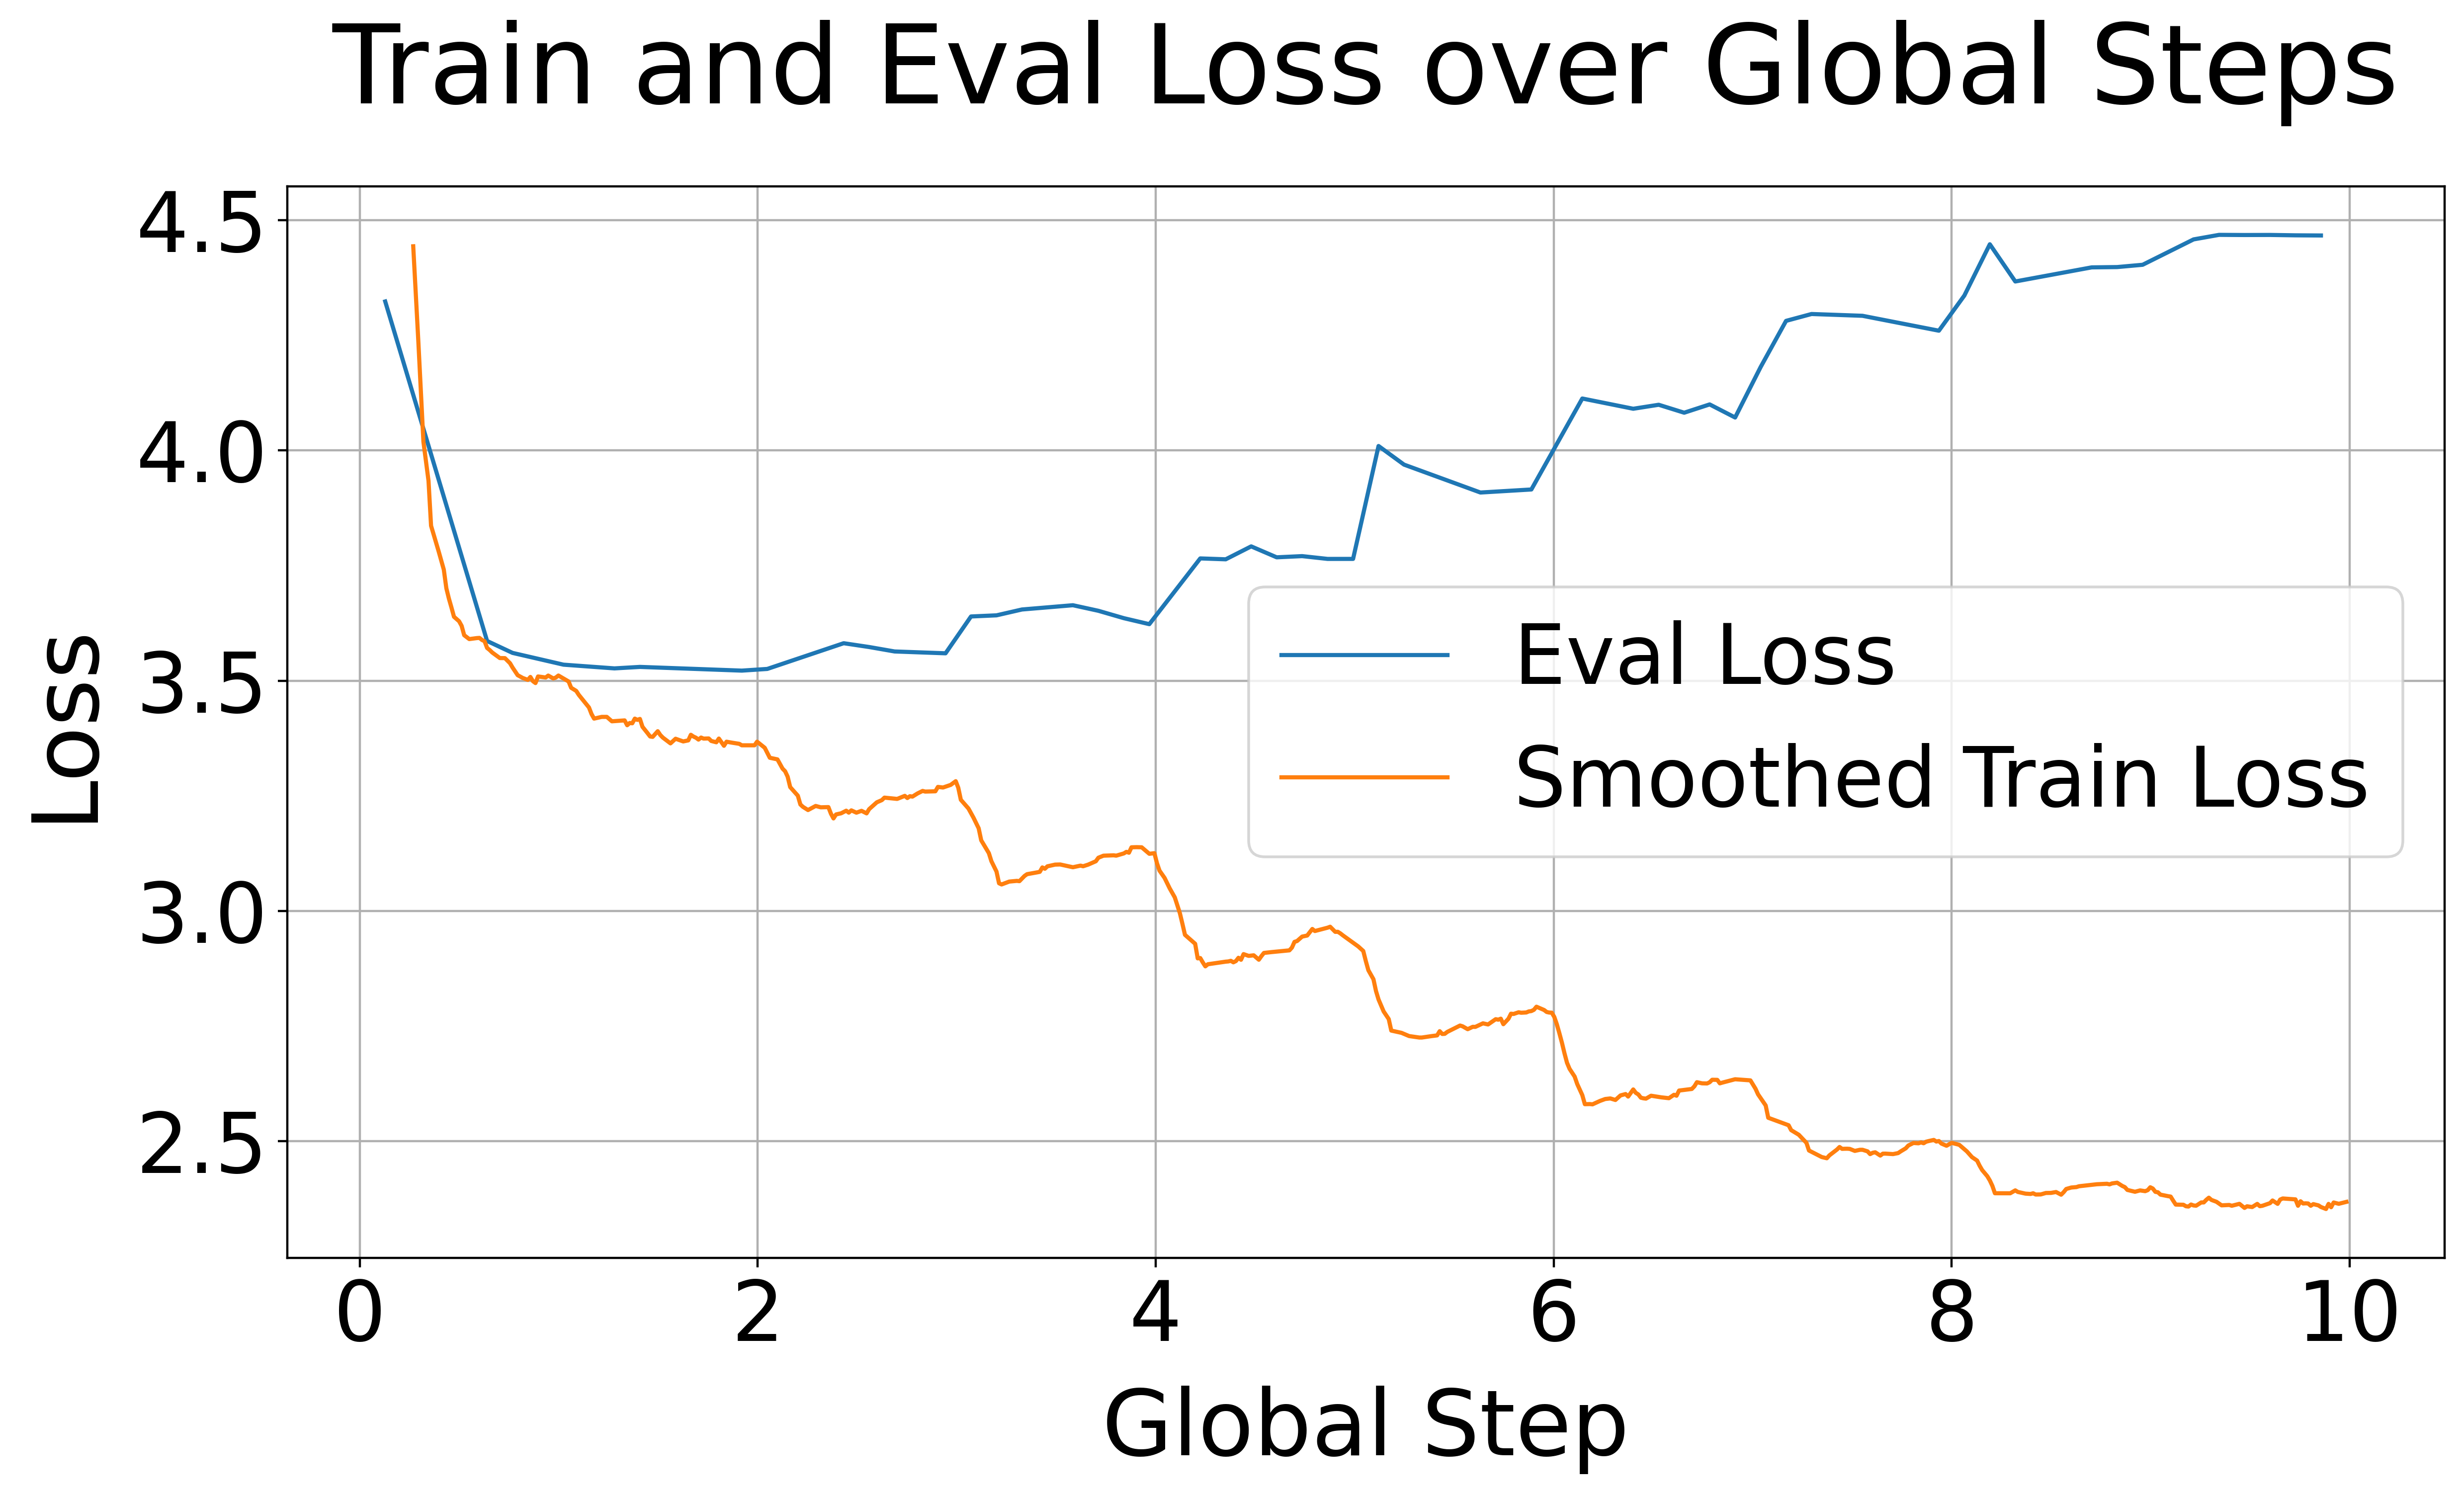

In [14]:
# Plot the cleaned data
plt.figure(figsize=(14, 7), dpi=400)

# smoothe the train loss
train_loss_cleaned["smoothed_loss"] = train_loss_cleaned["loss"].rolling(window=10).mean()
plt.plot(eval_loss_cleaned['global_step'], eval_loss_cleaned['loss'], label='Eval Loss')
plt.plot(train_loss_cleaned['global_step'], train_loss_cleaned["smoothed_loss"], label='Smoothed Train Loss')
plt.xlabel('Global Step', fontsize=33, labelpad=10)
plt.ylabel('Loss', fontsize=33, labelpad=10)
plt.title('Train and Eval Loss over Global Steps', fontsize=40, pad=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=30)
plt.grid()
plt.show()